## RATING PREDICTION PROJECT

In [1]:
#import libraries
import pandas as pd
import numpy as np

import random

import operator
import math
import tqdm

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud



import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import cross_val_score

import joblib

In [2]:
df=pd.read_csv('Rating_Reviews.csv')
df.head()

,Unnamed: 0,Ratings,Full_review
0,0,5,This is the best laptop in this range.I reciev...
1,1,5,Good product as used of now.... Everything is ...
2,2,5,AWESOME LAPTOP. It supports many high spec gam...
3,3,4,For that price... it's exceptionally good. Pla...
4,4,4,RAM upgrade is must do because the useable RAM...


In [3]:
#Basic info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31680 entries, 0 to 31679
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   31680 non-null  int64 
 1   Ratings      31680 non-null  int64 
 2   Full_review  31680 non-null  object
dtypes: int64(2), object(1)
memory usage: 742.6+ KB


In [4]:
#droping the Unnamed:0 column 
df.drop('Unnamed: 0', axis =1, inplace=True)

In [5]:
#lets see the column names
df.columns

Index(['Ratings', 'Full_review'], dtype='object')

In [6]:
#lets see the datatypes
df.dtypes

Ratings         int64
Full_review    object
dtype: object

In [7]:
#no of rows and columns
df.shape

(31680, 2)

In [8]:
#finding missing values
df.isnull().sum()

Ratings        0
Full_review    0
dtype: int64

<AxesSubplot:>

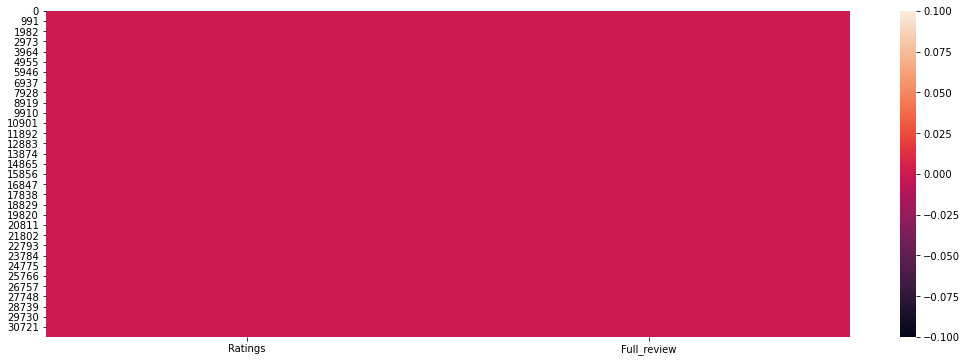

In [9]:
#graphical visualization of missing values
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull())

In [10]:
#Column Rating Statstics
df['Ratings'].unique()

array([5, 4, 1, 3, 2])

In [11]:
df['Ratings'].value_counts()

5    17307
4     5846
1     4777
3     2485
2     1265
Name: Ratings, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

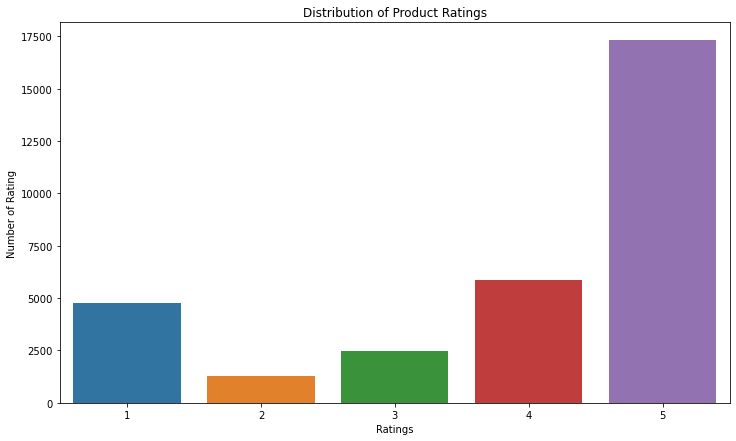

In [12]:
f,axes = plt.subplots(figsize=(12,7))
ax = sns.countplot(x=df['Ratings'])
ax.set(title="Distribution of Product Ratings",xlabel="Ratings",ylabel="Number of Rating")
plt.show

In [13]:
#Lets remove the word reveiw and replace it with 'read more'
df["Full_review"]=df["Full_review"].replace(to_replace='READ MORE', value="",regex=True)
df["Full_review"]

0        This is the best laptop in this range.I reciev...
1        Good product as used of now.... Everything is ...
2        AWESOME LAPTOP. It supports many high spec gam...
3        For that price... it's exceptionally good. Pla...
4        RAM upgrade is must do because the useable RAM...
                               ...                        
31675                                                   Ok
31676                                                Great
31677                             Nice product good shoot,
31678                                        Super product
31679                                                OK ok
Name: Full_review, Length: 31680, dtype: object

## Pre-Processing

In [14]:
#Getting the length of review
df['review_length']=df['Full_review'].str.len()
df.head()

,Ratings,Full_review,review_length
0,5,This is the best laptop in this range.I reciev...,500
1,5,Good product as used of now.... Everything is ...,271
2,5,AWESOME LAPTOP. It supports many high spec gam...,96
3,4,For that price... it's exceptionally good. Pla...,342
4,4,RAM upgrade is must do because the useable RAM...,500


In [15]:
#Converting all the characters in the reviews to lowercase
df['Full_review']=df['Full_review'].str.lower()
df

,Ratings,Full_review,review_length
0,5,this is the best laptop in this range.i reciev...,500
1,5,good product as used of now.... everything is ...,271
2,5,awesome laptop. it supports many high spec gam...,96
3,4,for that price... it's exceptionally good. pla...,342
4,4,ram upgrade is must do because the useable ram...,500
...,...,...,...
31675,5,ok,2
31676,5,great,5
31677,4,"nice product good shoot,",24
31678,5,super product,13


In [16]:
#Replace any email addresses as "emailaddress"
df['Full_review'] = df['Full_review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')
#Replace any web site addresses as "webaddress"
df['Full_review'] = df['Full_review'].str.replace(r"^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$",
                                             'webaddress')
#Replace any currencies as 'currencyamount'
df['Full_review'] = df['Full_review'].str.replace(r'£|\$|₹','currencyamount')
#Replace any phone numbers as "phonenumber"
df['Full_review'] = df['Full_review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
#Replace any numbers as "numbr"
df['Full_review'] = df['Full_review'].str.replace(r'\d+(\.\d+)?','numbr')
#Replace any non alphabetic characters with a blank space
df['Full_review'] = df['Full_review'].str.replace(r'[^\w\d\s]',' ')
#Replace any extra statuses with a single blank space
df['Full_review'] = df['Full_review'].str.replace(r'\s+',' ')

df

,Ratings,Full_review,review_length
0,5,this is the best laptop in this range i reciev...,500
1,5,good product as used of now everything is good...,271
2,5,awesome laptop it supports many high spec game...,96
3,4,for that price it s exceptionally good played ...,342
4,4,ram upgrade is must do because the useable ram...,500
...,...,...,...
31675,5,ok,2
31676,5,great,5
31677,4,nice product good shoot,24
31678,5,super product,13


In [17]:
#converting 'reveiw column ' types as str
df['Full_review']= df['Full_review'].astype('str')
df

,Ratings,Full_review,review_length
0,5,this is the best laptop in this range i reciev...,500
1,5,good product as used of now everything is good...,271
2,5,awesome laptop it supports many high spec game...,96
3,4,for that price it s exceptionally good played ...,342
4,4,ram upgrade is must do because the useable ram...,500
...,...,...,...
31675,5,ok,2
31676,5,great,5
31677,4,nice product good shoot,24
31678,5,super product,13


In [18]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prajwalkunder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prajwalkunder/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
#Remove all the stopwords
stop_words = set(stopwords.words('english')+['u','ur','im','doin','ure','i','so'])

df['Full_review'] = df['Full_review'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
df

,Ratings,Full_review,review_length
0,5,best laptop range recieved late delivery due b...,500
1,5,good product used everything good also ssd slo...,271
2,5,awesome laptop supports many high spec games l...,96
3,4,price exceptionally good played far cry numbr ...,342
4,4,ram upgrade must useable ram numbrgb ryzen num...,500
...,...,...,...
31675,5,ok,2
31676,5,great,5
31677,4,nice product good shoot,24
31678,5,super product,13


In [20]:
#Get the lenth of cleaned reveiw texts
df['clean_length'] = df['Full_review'].str.len()

print('Original length', df.review_length.sum())
print('Clean length', df.clean_length.sum())

Original length 2511033
Clean length 1777349


In [21]:
#Lemmetizing
WL = WordNetLemmatizer()
df['Full_review']=df['Full_review'].apply(lambda x: ' '.join(WL.lemmatize(i) for i in x.split()))
df.head(10)

,Ratings,Full_review,review_length,clean_length
0,5,best laptop range recieved late delivery due b...,500,337
1,5,good product used everything good also ssd slo...,271,150
2,5,awesome laptop support many high spec game lik...,96,84
3,4,price exceptionally good played far cry numbr ...,342,254
4,4,ram upgrade must useable ram numbrgb ryzen num...,500,386
5,4,people r going buy r buyed product face proble...,500,354
6,5,good gameing laptop price display good battery...,100,72
7,4,best laptop price range believe willing buy la...,498,304
8,4,amd apu disappointment guy know amd integrated...,500,281
9,4,okay ive using laptop since day week really li...,491,371


# Word Clouds

***Word cloud for Rating 1***

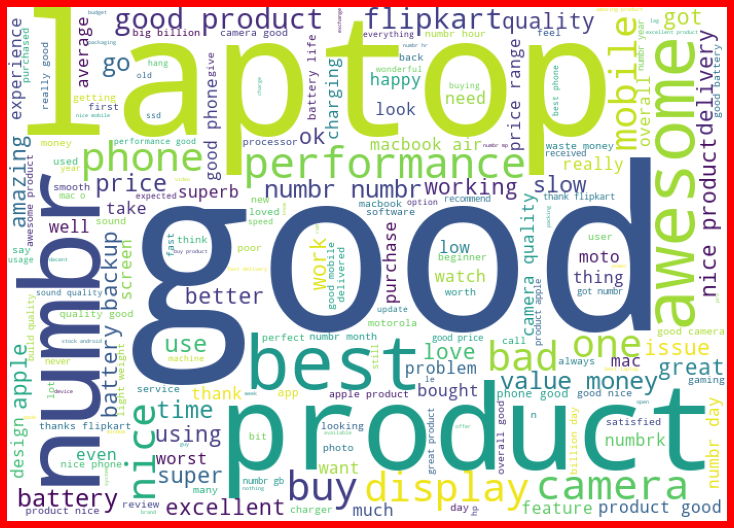

In [22]:
#Getting sense of words in Rating 1
plot = df['Full_review'][df['Ratings']==1.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

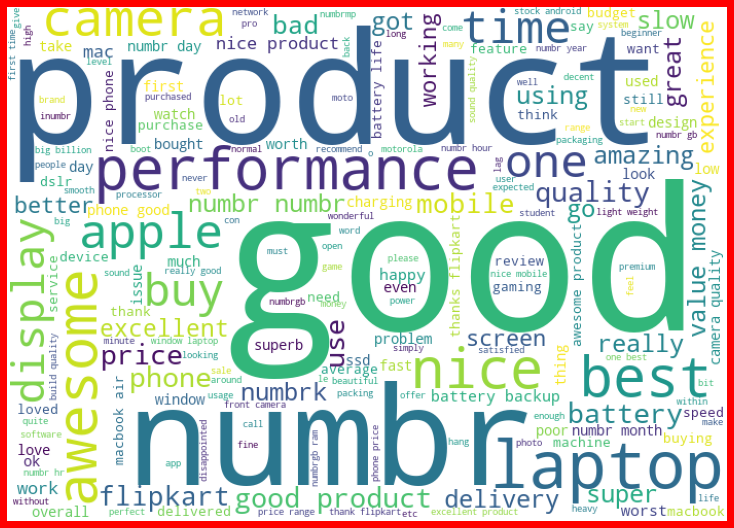

In [23]:
plot = df['Full_review'][df['Ratings']==2.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

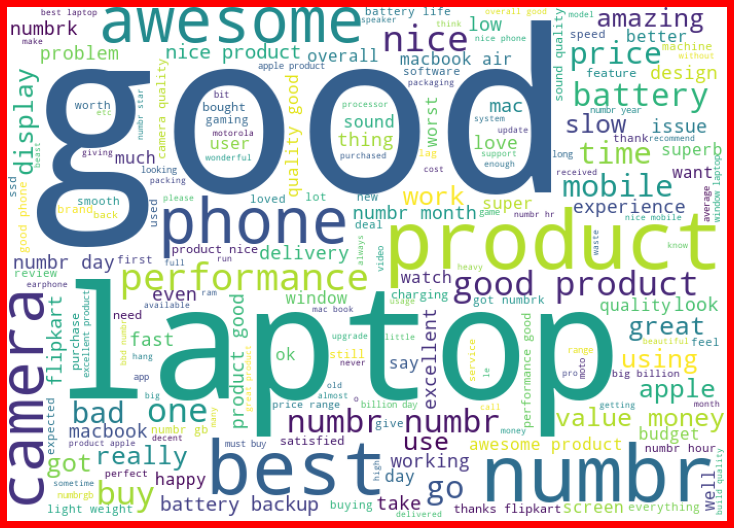

In [24]:
plot = df['Full_review'][df['Ratings']==3.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Feature selection

In [25]:
#Creating TFIDF features of monogram, bigram and trigram with max features upto 4000
tf_vec = TfidfVectorizer(ngram_range=(1,3),max_features=10000)

features = tf_vec.fit_transform(df['Full_review'])

x = features
y = df['Ratings']

In [27]:
#Creating train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.20)

## Model Selection

In [28]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [29]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [30]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

In [31]:
Model= []
score= []
cvs=[]
for name,model in models:

    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    AS=accuracy_score(y_test,pre)
    score.append(AS*100)
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')

KNeighborsClassifier(n_neighbors=6)


classification_report
               precision    recall  f1-score   support

           1       0.22      0.16      0.18       944
           2       0.05      0.04      0.04       251
           3       0.09      0.03      0.04       509
           4       0.19      0.11      0.14      1203
           5       0.55      0.74      0.63      3429

    accuracy                           0.45      6336
   macro avg       0.22      0.21      0.21      6336
weighted avg       0.38      0.45      0.40      6336



DecisionTreeClassifier(random_state=6)


classification_report
               precision    recall  f1-score   support

           1       0.19      0.16      0.17       944
           2       0.01      0.01      0.01       251
           3       0.07      0.04      0.05       509
           4       0.20      0.11      0.14      1203
           5       0.55      0.72      0.62      3429

    accuracy                           0.43      6336
   m

In [32]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,44.633838,43.491162
1,DecisionTreeClassifier,43.402778,40.836490
2,RandomForestClassifier,49.273990,46.859217
3,AdaBoostClassifier,53.945707,53.538510
4,MultinomialNB,53.440657,50.940657
5,GradientBoostingClassifier,54.056187,53.715278
6,BaggingClassifier,47.632576,45.454545
7,ExtraTreesClassifier,46.196338,43.948864


## HYPERPARAMETER TUNING

In [33]:
#RandomForestClassifier
parameters={'n_estimators':[1,10,100]}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=96)   
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train,y_train)
print(rfc.best_params_)     
print(rfc.best_score_)

{'n_estimators': 100}
0.4976720328282829


In [34]:
#Using the best parameters obtained
gbc=GradientBoostingClassifier(random_state=96,n_estimators=100)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbc,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  54.00883838383839
Cross validation score:  53.96464646464646
Classification report: 

              precision    recall  f1-score   support

           1       0.75      0.02      0.03       944
           2       0.00      0.00      0.00       251
           3       0.20      0.00      0.01       509
           4       0.10      0.00      0.00      1203
           5       0.54      0.99      0.70      3429

    accuracy                           0.54      6336
   macro avg       0.32      0.20      0.15      6336
weighted avg       0.44      0.54      0.39      6336

Confusion matrix: 

[[  15    1    1    3  924]
 [   0    0    1    0  250]
 [   0    2    2    0  505]
 [   1    1    2    2 1197]
 [   4    3    4   15 3403]]


In [35]:
rating_predictor_final_model = GradientBoostingClassifier(n_estimators = 233, 
                                          min_samples_split = 2, 
                                          min_samples_leaf = 1, 
                                          max_features = 'auto', 
                                          max_depth = 100)

In [36]:
rating_predictor_final_model

GradientBoostingClassifier(max_depth=100, max_features='auto', n_estimators=233)

## Final model

In [39]:
rating_prediciton=rfc.predict(x)
Ratings_Prediction = pd.DataFrame({'Prediciton' : rating_prediciton})
Ratings_Prediction.head(5)

,Prediciton
0,5
1,5
2,5
3,4
4,5


In [40]:
#saving our model
import joblib
joblib.dump(RF,'Ratings_prediction.csv')

['Ratings_prediction.csv']